1. 

En este ejercicio vas a trabajar con un clasificador binario. Para ello utilizarás el dataset usuarios_win_mac_lin.csv. Elimina del dataframe todas las filas que se correspondan con la clase valor "1". Encontrarás datos de navegación de usuarios dentro de una web (paginas, duración...) y tendrás que predecir desde qué sistema operativo viene el usuario.

Realiza el ejercicio con el nuevo dataframe (eliminando los 1s):

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('data/usuarios_win_mac_lin.csv')
df.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [13]:
df = df[df['clase'] != 1]

In [15]:
df.clase.unique()

array([2, 0], dtype=int64)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  130 non-null    float64
 1   paginas   130 non-null    int64  
 2   acciones  130 non-null    int64  
 3   valor     130 non-null    int64  
 4   clase     130 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 11.1 KB


In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(['clase'], axis=1)
y = df['clase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [23]:
predictions = log_reg.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, predictions)

In [34]:
c_matrix_df = pd.DataFrame(c_matrix, columns=['pred_0', 'pred_2'], index=['vd_0', 'vd_2'])

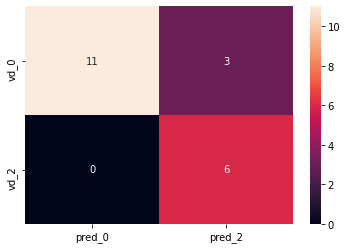

In [37]:
sns.heatmap(c_matrix_df, annot=True);

In [44]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(log_reg.predict(X_train) , y_train)
acc_test = accuracy_score(log_reg.predict(X_test), y_test)

print('ACC_TRAIN', acc_train)
print('ACC_TEST', acc_test)

ACC_TRAIN 0.9545454545454546
ACC_TEST 0.85
